### MEDC0106: Bioinformatics in Applied Biomedical Science

<p align="center">
  <img src="../../resources/static/Banner.png" alt="MEDC0106 Banner" width="90%"/>
  <br>
</p>

---------------------------------------------------------------

# 11 - Introduction to Biopython - Proteins

*Written by:* Mateusz Kaczyński

**This notebook provides an introduction on using protein data in Biopython  - from analysis to property prediction and similarity search to a brief entry to PDB / 3D file operations.**


## Contents


1. [Basic analysis](#Basic-analysis)
2. [Property prediction](#Property-prediction)
3. [BLAST](#BLAST)
4. [PDB files](#PDB-files)
5. [Discussion](#Discussion)
-----

#### Extra Resources:

- [Official Biopython tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html) - A comprehensive guide to the library capabilities.
- [Biopython API documentation](https://biopython.org/docs/latest/api/index.html) - a long, detailed list of all methods and connectors provided by Biopython.
- [Rosalind](http://rosalind.info) - A bioinformatics learning platform that includes exercises.


Importing required modules and functions.

In [159]:
import Bio
print("Module", Bio.__name__, "version", Bio.__version__)
from urllib.request import urlretrieve
from Bio import SeqIO

Module Bio version 1.79


## Basic analysis

**Biopython** provides various tools to analyse proteins.

We will be analysing Cystic Fibrosis Transmembrane Conductance regulator (CFTR) gene and the protein it encodes.

**Ensembl**: https://www.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000001626;r=7:117287120-117715971

**Uniprot**: https://www.uniprot.org/uniprot/P13569

First, we will download the corresponding FASTA file to extract the sequence.

In [160]:
urlretrieve("https://www.uniprot.org/uniprot/P13569.fasta", "data/P13569.fasta")
# `next` method allows to get the first element of the sequence. 
cftr_aa = next(SeqIO.parse("data/P13569.fasta", "fasta"))
print(cftr_aa)

ID: sp|P13569|CFTR_HUMAN
Name: sp|P13569|CFTR_HUMAN
Description: sp|P13569|CFTR_HUMAN Cystic fibrosis transmembrane conductance regulator OS=Homo sapiens OX=9606 GN=CFTR PE=1 SV=3
Number of features: 0
Seq('MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLE...TRL')


**Biopython** contains `ProteinAnalysis` class that wraps a collection of protein analysis functionality.

In [161]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
analysis = ProteinAnalysis(str(cftr_aa.seq))

# To delve into the full functionality of the ProteinAnalysis class, you can use `help` function.
# Uncomment the next line to see what other information can be obtained from `analysis` object.
# help(analysis)

Let's take a look at a simple summary of how many aminoacids are present in the protein.

*Note the use of pprint (PrettyPrint) to make the dense dictionary more user-friendly.*

In [162]:
count_of_aas = analysis.count_amino_acids() 
print("Count of particular aminoacids")
print(count_of_aas)
print("Using PrettyPrint for more user-friendly representation.")
import pprint
pprint.pprint(count_of_aas)

Count of particular aminoacids
{'A': 83, 'C': 18, 'D': 58, 'E': 93, 'F': 85, 'G': 84, 'H': 25, 'I': 119, 'K': 92, 'L': 183, 'M': 37, 'N': 54, 'P': 45, 'Q': 67, 'R': 78, 'S': 123, 'T': 83, 'V': 90, 'W': 23, 'Y': 40}
Using PrettyPrint for more user-friendly representation.
{'A': 83,
 'C': 18,
 'D': 58,
 'E': 93,
 'F': 85,
 'G': 84,
 'H': 25,
 'I': 119,
 'K': 92,
 'L': 183,
 'M': 37,
 'N': 54,
 'P': 45,
 'Q': 67,
 'R': 78,
 'S': 123,
 'T': 83,
 'V': 90,
 'W': 23,
 'Y': 40}


Let's take a look at some protein properties available.

`"{:.2f}"` is used to print only a `float` number to the first two decimal places.

In [163]:
print("Molecular weigth    :", "{:.2f}".format(analysis.molecular_weight()))
print("Charge at a given pH:", "{:.2f}".format(analysis.charge_at_pH(5.8)))
print("Isoelectric point   :", "{:.2f}".format(analysis.isoelectric_point()))
in_helix, in_turn, in_sheet = analysis.secondary_structure_fraction()
print(
    "Fractions of AA associated with secondary structures:\n"\
    "  Helix: {:.2f}\n"\
    "  Turn: {:.2f}\n"\
    "  Sheet: {:.2f}\n".format(in_helix, in_turn, in_sheet)
)

Molecular weigth    : 168139.53
Charge at a given pH: 38.97
Isoelectric point   : 8.91
Fractions of AA associated with secondary structures:
  Helix: 0.36
  Turn: 0.21
  Sheet: 0.27



We can also use the helper functions provided to create new statistics. 

For example, let's calculate BCAA (branch-chain amino acid) content of the protein.

In [164]:
total_number_of_LIV_aas = sum(count_of_aas[aa] for aa in ["L", "I", "V"])
print("BCAA content:", total_number_of_LIV_aas / len(cftr_aa))

BCAA content: 0.2648648648648649


## Property prediction
In this section, we will analyse the hydrophobicity of the protein. 

[The Kyte-Doolittle scale](https://doi.org/10.1016/0022-2836(82)90515-0) is useful for predicting the hydropathic character of the molecule and is based on the experimentally - derived aminoacid properties as defined below.

In [165]:
Kyte_and_Doolittle_scale = {
    "A": 1.8,  "C": 2.5,  "D": -3.5, "E": -3.5, "F": 2.8, 
    "G": -0.4, "H": -3.2, "I": 4.5,  "K": -3.9, "L": 3.8,
    "M": 1.9,  "N": -3.5, "P": -1.6, "Q": -3.5, "R": -4.5,
    "S": -0.8, "T": -0.7, "V": 4.2,  "W": -0.9, "Y": -1.3
}

In [166]:
sequence = """MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRE
LASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIA
IYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQL
VSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGL
GRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAA
YVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQT
WYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRK
TSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEG
KIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIV
LGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTR
ILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNS
ILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQ
MNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQG
QNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESI
PAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRN
NSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAP
MSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATV
PVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHK
ALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIM
STLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKK
DDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRL
LNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVAD
EVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVT
YQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQA
ISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL""".replace("\n", "")

We will use a sliding window approach.

>For a pre-defined window size of `n`, at any given point in the sequence, we will average its current and `(n-1)/2` preceding and proceeding values.

You can think of it as a fixed-size rectangle moving across the sequence, averaging out the results to calculate the mean value of a wider section.

In [167]:
window_size = 11

hydrophobicity = []  # The hydrophobicity value at a given point in the sequence.
for i, aa in enumerate(sequence):  # This will return tuple of a position in the sequence and the aminoacid.
    window_start = int(i - (window_size-1)/2)
    window_end = int(i + (window_size-1)/2)+1

    if window_start < 0 or window_end > len(sequence):
        window_hydrophobicity = None  # At the very beginning and at the very end the window will be outside of the sequence.

    else:
        aas_in_window = sequence[window_start:window_end]  # A list of all the aminoacids in the window.
        window_hydrophobicity = sum([Kyte_and_Doolittle_scale[aa] for aa in aas_in_window]) / window_size
    hydrophobicity.append(window_hydrophobicity)

print("Calculated hydrophobicity for {} positions".format(len(hydrophobicity)))

# Note that this is slightly different than GRAVY from the reference paper.
print("Average hydrophobicity:", "{:.4f}".format(sum(h if h else 0 for h in hydrophobicity) / len(hydrophobicity))) 

Calculated hydrophobicity for 1480 positions
Average hydrophobicity: 0.0318


Now let's plot the hydrophobicity along the sequence to detect hydrophobic and hydrophilic regions. 

We will initialise `matplotlib` visualisation so that figures can be displayed in notebook cells.

Then we will ask it to plot the `hydrophobicity` list from the previous calculation.

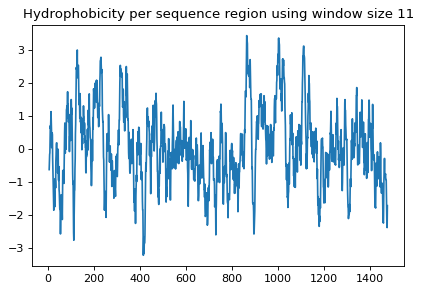

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

plt.plot(hydrophobicity)
plt.title("Hydrophobicity per sequence region using window size {}".format(window_size))
plt.show()

## BLAST
Basic Local Alignment Search Tool allows finding similar regions across proteins and retrieving the most similar ones.

**Biopython** provides tools for both local BLAST tools (e.g. those normally run on a command line) as well as remote computation services. In this section, we will use NCBI BLAST cloud services.

*Note: running BLAST is computationally heavy, especially so with large databases of sequences, expect any calls to take at least several minutes.*

**Biopython** Blast module contains two classes:
 - `NCBIWWW` - to issue queries to the remote server
 - `NCBIXML` - to convert results (in XML format) to an object that can be easily used in the code

In [171]:
from Bio.Blast import NCBIWWW, NCBIXML
# This code will take several minutes to run as it executes a BLAST search in NCBI cloud environment.
query_handle = NCBIWWW.qblast("blastp", database="nr", sequence=cftr_aa.seq)
blast_results = next(NCBIXML.parse(query_handle))

In order to visualise the results, we could simply iterate over them, printing the relevant information.

Here we will use `pandas` library to display the results.

In [172]:
import pandas as pd
df = pd.DataFrame([
    {
        "title": a.title, 
        "accession": a.accession, 
        "hit_def": a.hit_def, 
        "length": a.length, 
        "e_value": a.hsps[0].expect
    } 
    for a in blast_results.alignments
])

df[:20]

,title,accession,hit_def,length,e_value
0,"pdb|5UAK|A Dephosphorylated, ATP-free human cy...",5UAK_A,"Dephosphorylated, ATP-free human cystic fibros...",1489,0.0
1,ref|NP_000483.3| cystic fibrosis transmembrane...,NP_000483,cystic fibrosis transmembrane conductance regu...,1480,0.0
2,gb|AAC13657.1| cystic fibrosis transmembrane c...,AAC13657,cystic fibrosis transmembrane conductance regu...,1480,0.0
3,"pdb|6MSM|A Phosphorylated, ATP-bound human cys...",6MSM_A,"Phosphorylated, ATP-bound human cystic fibrosi...",1489,0.0
4,gb|QTH79672.1| cystic fibrosis transmembrane c...,QTH79672,cystic fibrosis transmembrane conductance regu...,1480,0.0
5,gb|QTH79670.1| cystic fibrosis transmembrane c...,QTH79670,cystic fibrosis transmembrane conductance regu...,1480,0.0
6,gb|ABD72213.1| cystic fibrosis transmembrane c...,ABD72213,cystic fibrosis transmembrane conductance regu...,1480,0.0
7,gb|AAA35680.1| cystic fibrosis transmembrane c...,AAA35680,cystic fibrosis transmembrane conductance regu...,1480,0.0
8,ref|XP_003808695.1| cystic fibrosis transmembr...,XP_003808695,cystic fibrosis transmembrane conductance regu...,1480,0.0
9,ref|XP_018885847.2| cystic fibrosis transmembr...,XP_018885847,cystic fibrosis transmembrane conductance regu...,1480,0.0


## PDB files
PDB files contain the full 3D representation of the proteins - either experimentally-derived or predicted. 

Here we will take a brief look at how to download and parse them. Systems such as Pymol can be used to inspect the 3D structure and interactions on the atomic level.

We will download and briefly analyse the experimentally determined [structure of the protein encoded by CFTR gene](https://www.rcsb.org/structure/6O1V).

In [173]:
from urllib.request import urlretrieve 
result_location, _ = urlretrieve("https://files.rcsb.org/download/6O1V.pdb", "data/6O1V.pdb")
print("File downloaded to:", result_location)

File downloaded to: data/6O1V.pdb


In [174]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure("6O1V", "data/6O1V.pdb")

/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10348.
  warnings.warn(


Warnings like the one above are common when reading PDB files. This is due to (often) small incompatibilities between the standard and the content of the generated files. 

**Biopython** allows for strict parsing, i.e. if specified, this warning would turn to an error, which would prevent the execution of this code. This would, however, be impractical as these small abnormalities are commonplace.

PDB files contain the hierarchical representation consisting of:
 - `structure` at the top level
 - `model` nested underneath
 - `chain` - in this case there are 2
 - `residue` - belonging to a chain - a particular aminoacid
 - `atom` - which contains the coordinates
 
 More information on the PDB structure and representation can be [found here](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/introduction).
 
 Let's traverse the parsed file and calculate some statistics. We will be interested in rhe total TRP count and the number of carbon atoms.


In [175]:
total_TRP_residues = 0
total_carbon_atoms = 0

for model in structure:
    for chain in model:
        for residue in chain:
            if residue.resname == "TRP":
                total_TRP_residues += 1
            for atom in residue:
                if atom.element=="C":
                    total_carbon_atoms += 1 

print("Total number of TRP aminoacids in the structure:", total_TRP_residues)
print("Total number of carbon atoms in the structure:  ", total_carbon_atoms)

Total number of TRP aminoacids in the structure: 22
Total number of carbon atoms in the structure:   6347


We can leverage the coordinates provided by the atoms to find out the `bounding box` around the structure - by finding out the minimum and maximum value for each dimension.

In [176]:
# We start from extreme values and expect them to go down once we encounter a `better` value.
min_atom_coord = [1000, 1000, 1000]
max_atom_coord = [-1000, -1000, -1000]

for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                coord=atom.coord
                for dim, val in enumerate(coord):
                    if val < min_atom_coord[dim]:
                        min_atom_coord[dim] = val
                    elif val > max_atom_coord[dim]:
                        max_atom_coord[dim] = val
                
print("Minimum coordinates for each dimension:         ", min_atom_coord)
print("Maximum coordinates for each dimension:         ", max_atom_coord)

Minimum coordinates for each dimension:          [121.966, 115.246, 71.133]
Maximum coordinates for each dimension:          [187.875, 192.4, 203.823]


`Bio.PDB` module contains further utilities to acquire, save, transform and superimpose contents of the PDB files - including `mmcif` format. These can then be filtered or adjusted accordingly before performing deeper analysis with 3D-first tools such as Pymol.

## Discussion
This notebook provided an introduction to the protein-related functionality of *Biopython*. Here we studied how to perform analysis and search for related proteins in a programmable, repeatable, and scalable way.

*Biopython* is a much larger library, with a plethora of functionality. It can provide you with tried and tested algorithms and connectors to speed up your research. However, due to the size of the library *(we could easily spend all this time on reading the general information on each module it contains)*, we have only taken a look at the very small subset of what it can offer.

Don't be afraid to experiment and play around with the cells in this notebook. If you are interested in learning more, take a look at the extra resources outlined in the top section.

Take a look at the exercises to try out what you learnt.

Click [here](#Contents) to go back to the contents.